# Imports

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
style.use('tableau-colorblind10')
import matplotlib.ticker as ticker

# Functions

In [8]:

def import_data_ids(name: str):
    # This has been modified to only record when a DS TWR happens and the IDs
    file = name + ".csv"
    
    my_id = 0

    ts_i = np.empty((0))
    id_i = np.empty((0))    

    ts_j = np.empty((0))
    id_j = np.empty((0))

    ts_sync = np.empty((0))
    
    # ignore all measurements that happen before 20 s and after 180 s
    low_bound = 40e6
    upp_bound = 140e6

    with open(file, "r") as f:
        reader = csv.reader(f)
        for i, line in enumerate(reader):
            linetype = int(line[0])

            if (linetype==3):
                if (low_bound < int(line[1]) and int(line[1]) < upp_bound):
                    # TWR with timestamp
                    ts_i = np.append(ts_i, int(line[1])) 
                    id_i = np.append(id_i, int(line[2]))

            if (linetype==4):
                if (low_bound < int(line[1]) and int(line[1]) < upp_bound):
                    # Receiving end of DS TWR 
                    ts_j = np.append(ts_j, int(line[1])) 
                    id_j = np.append(id_j, int(line[2]))

            if (linetype==5):
                # read id of node
                my_id = int(line[1])

            if (linetype==6):
                if (low_bound < int(line[1]) and int(line[1]) < upp_bound):
                    # Ts of sync
                    ts_sync = np.append(ts_sync, int(line[1]))

    
    return (my_id, ts_i, id_i, ts_j, id_j, ts_sync)

# Prepare data

In [9]:
my_id = [] 
ts_i = []
id_i = []
ts_j = []
id_j = []
ts_sync = []

# List of measurements:
#files = ["kall_col_log", "mel_col_log", "ron_col_log"]
files = ["kal_cl_big", "mel_cl_big", "ron_cl_big"]
log_num = len(files)
for log in files:
    temp_my_id, temp_ts_i, temp_id_i, temp_ts_j, temp_id_j, temp_sync = import_data_ids(log)
    my_id += [temp_my_id]
    ts_i += [temp_ts_i]
    id_i += [temp_id_i]
    ts_j += [temp_ts_j]
    id_j += [temp_id_j]
    ts_sync += [temp_sync]

# Plot data

In [10]:
# average measurements made per node

for i in range(log_num):
    meas_num = ts_i[i].shape[0]
    delta_t = (ts_i[i][-1] - ts_i[i][0])/1e6

    avg_meas = meas_num/delta_t
    print("Average measurements: " + str(avg_meas))


Average measurements: 18.200699837932678
Average measurements: 18.362886767551604
Average measurements: 18.41743615515681


In [11]:
# Number of succesfull measurements pr sync
for i in range(log_num):
    meas_num = ts_i[i].shape[0]
    meas_sync = ts_sync[i].shape[0]

    avg_meas = meas_num/(meas_sync)
    print("Average measurements: " + str(avg_meas))

Average measurements: 1.4093023255813955
Average measurements: 1.4140323824209715
Average measurements: 1.4153846153846155


# Measurements over time

Text(0.5, 1.12, 'Ranges returned by DS TWR over two minutes')

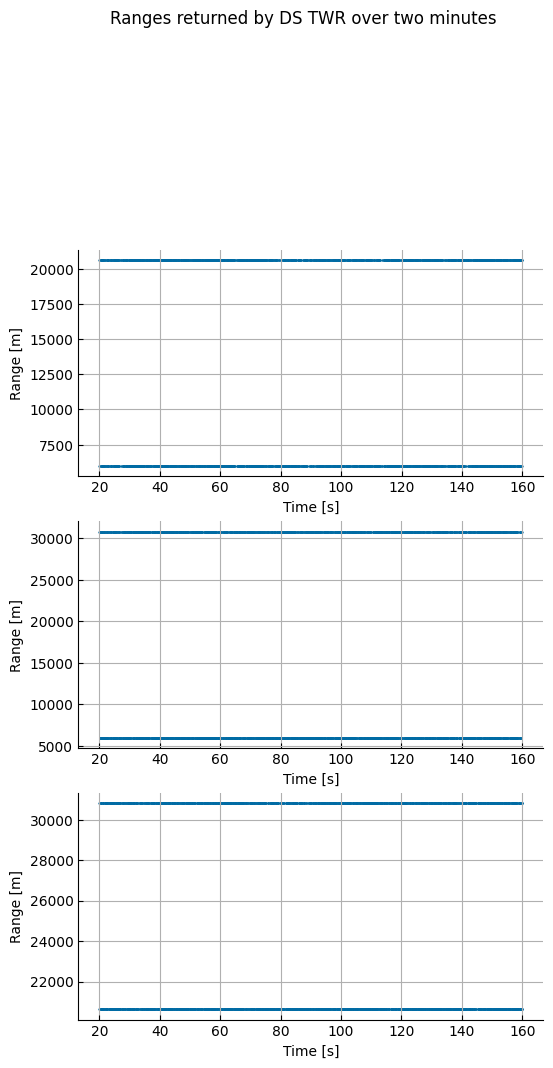

In [13]:
names = ['n1', 'n2', 'n4']

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

for i in range(log_num):
    axs[i].scatter( (ts_i[i])/1e6, id_i[i] , s=0.5, label = names[i])
    axs[i].set_ylabel("Range [m]")
    axs[i].set_xlabel("Time [s]")

    axs[i].grid(which='both')
    axs[i].spines[['right', 'top']].set_visible(False)
    axs[i].tick_params(direction='in', which='both')
fig.suptitle('Ranges returned by DS TWR over two minutes', y=1.12)

#lgnd = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncols=5, mode="expand", borderaxespad=0., scatterpoints=1, fancybox=False, edgecolor='black', title='Nodes participating in measurement')
#lgnd = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncols=5, mode="expand", borderaxespad=0., scatterpoints=1, fancybox=False, edgecolor='black', title='$d_\mathrm{ref}$')
#for handle in lgnd.legend_handles:
#    handle.set_sizes([20.0])